In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt
import torch.nn.init as init
import time
import random
import pandas as pd
import openpyxl
from openpyxl import load_workbook

Data saved to error_1side_fulldomain.xlsx


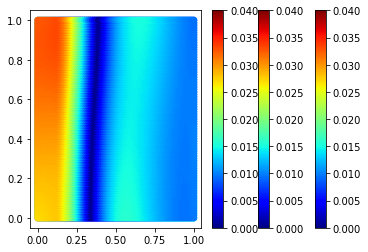

In [5]:
x_l = 0
x_r = 1
y_b = 0
y_t = 1
N_x = 81
N_y = 81

X = np.linspace(x_l,x_r,N_x)
X_np = np.tile(X,N_y)
Y = np.linspace(y_b,y_t,N_y)
Y_np = np.repeat(Y,N_x)

workbook = openpyxl.Workbook()

for time in [1.5, 3, 4.5]:
    file_path = 'PINN_1side_fulldomain.xlsx'
    sheet_name = 't = ' + str(time)
    PINN = pd.read_excel(file_path, sheet_name=sheet_name)
    X = PINN['X'].values
    Y = PINN['Y'].values
    PINN = PINN['T'].values

    file_path = '2d_1side_heating.xlsx'
    sheet_name = 't = ' + str(time)
    CFD = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    CFD = CFD.values
    CFD = CFD[:,:N_x]
    CFD = CFD.flatten()
    CFD = CFD[:N_x*N_y]
    
    error = abs(PINN - CFD)
    
    sc = plt.scatter(X, Y, c = error, cmap=plt.cm.jet)
    plt.clim(0,0.04)
    plt.colorbar(sc)
    
    arr = np.column_stack((X, Y, CFD, PINN, error)).tolist()
    sheet = workbook.create_sheet(title="t = "+str(time))
    sheet.append(['X', 'Y', 'CFD', 'PINN', 'error'])
    for row in arr:
        sheet.append(row)
        
file_name = "error_1side_fulldomain.xlsx"
workbook.save(file_name)
print(f"Data saved to {file_name}")

In [4]:
CFD

array([0.25737625, 0.2450724 , 0.23315138, ..., 0.00036155, 0.00035499,
       0.00035499])

In [10]:
x_l = 0
x_r = 1
y_b = 0
y_t = 1
N_x = 81
N_y = 81

X = np.linspace(x_l,x_r,N_x)
X_np = np.tile(X,N_y)
Y = np.linspace(y_b,y_t,N_y)
Y_np = np.repeat(Y,N_x)

workbook = openpyxl.Workbook()

for time in [0.5,1,1.4,2.1]:
    
    X_new = []
    Y_new = []
    T_new = []
    
    file_path = 'PINN_2side_fulldomain.xlsx'
    sheet_name = 't = ' + str(time)
    PINN = pd.read_excel(file_path, sheet_name=sheet_name)
    X = PINN['X'].values
    Y = PINN['Y'].values
    PINN = PINN['T'].values

    file_path = '2d_2side_heating.xlsx'
    sheet_name = 't = ' + str(time)
    CFD = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    CFD = CFD.values
    CFD = CFD.flatten()
    for i in range(N_x*N_y):
#         if X_np[i]>0.4 and Y_np[i]>0.4:
#             continue
#         else:
        X_new.append(X_np[i])
        Y_new.append(Y_np[i])
        T_new.append(CFD[i])
    
    CFD = T_new
    error = abs(PINN - CFD)
     
    arr = np.column_stack((X, Y, CFD, PINN, error)).tolist()
    sheet = workbook.create_sheet(title="t = "+str(time))
    sheet.append(['X', 'Y', 'CFD', 'PINN', 'error'])
    for row in arr:
        sheet.append(row)
        
file_name = "error_2side_fulldomain.xlsx"
workbook.save(file_name)
print(f"Data saved to {file_name}")

Data saved to error_2side_fulldomain.xlsx


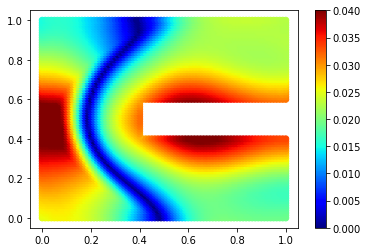

In [23]:
x_l = 0
x_r = 1
y_b = 0
y_t = 1
N_x = 81
N_y = 81

X = np.linspace(x_l,x_r,N_x)
X_np = np.tile(X,N_y)
Y = np.linspace(y_b,y_t,N_y)
Y_np = np.repeat(Y,N_x)

workbook = openpyxl.Workbook()

for time in [2.1]:
    
    X_new = []
    Y_new = []
    T_new = []
    
    file_path = 'PINN_3side.xlsx'
    sheet_name = 't = ' + str(time)
    PINN = pd.read_excel(file_path, sheet_name=sheet_name)
    X = PINN['X'].values
    Y = PINN['Y'].values
    PINN = PINN['T'].values

    file_path = '2d_3side_heating.xlsx'
    sheet_name = 't = ' + str(time)
    CFD = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    CFD = CFD.values
    CFD = CFD.flatten()
    for i in range(N_x*N_y):
#         print(i)
        if X_np[i]>0.4 and Y_np[i]>0.4 and Y_np[i]<0.6:
            continue
        else:
            X_new.append(X_np[i])
            Y_new.append(Y_np[i])
            T_new.append(CFD[i])
    
    CFD = T_new
    error = abs(PINN - CFD)
    
    sc = plt.scatter(X, Y, c = error, cmap=plt.cm.jet)
    plt.clim(0,0.04)
    plt.colorbar(sc)
    
    arr = np.column_stack((X, Y, CFD, PINN, error)).tolist()
    sheet = workbook.create_sheet(title="t = "+str(time))
    sheet.append(['X', 'Y', 'CFD', 'PINN', 'error'])
    for row in arr:
        sheet.append(row)
        
# file_name = "error_3side.xlsx"
# workbook.save(file_name)
# print(f"Data saved to {file_name}")

In [11]:
sides = 2
time = 2.1

file_path = 'error_'+str(sides)+'side_fulldomain.xlsx'
sheet_name = 't = ' + str(time)
DF = pd.read_excel(file_path, sheet_name=sheet_name)
X = DF['X'].values
Y = DF['Y'].values
CFD = DF['CFD'].values
PINN = DF['PINN'].values
error = DF['error'].values
    
X_new = []
T_pinn = []
T_fvm = []
y_req = 0.2

workbook = openpyxl.Workbook()
# workbook = load_workbook(str(sides)+'side_y=0.5_fulldomain.xlsx')

for i in range(X.shape[0]):

    if round(Y[i],2) == round(X[i],2): 
        X_new.append(X[i])
        T_pinn.append(PINN[i])
        T_fvm.append(CFD[i])
        
    
arr = np.column_stack((X_new, T_pinn, T_fvm)).tolist()
sheet = workbook.create_sheet(title="y = "+str(y_req)+", t = "+str(time))
sheet.append(['X', 'T_pinn', 'T_fvm'])
for row in arr:
    sheet.append(row)
        
file_name = str(sides)+"side_y=x_fulldomain.xlsx"
workbook.save(file_name)
print(f"Data saved to {file_name}")

Data saved to 2side_y=x_fulldomain.xlsx
